## Statistics


## One-sample t-tests

In [9]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from collections import Counter
from numpy import random
import scipy.stats as ss
from scipy.stats import norm
%matplotlib inline
sns.set(color_codes=True)
import requests
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
# Construct the Confusion Matrix
from sklearn.metrics import confusion_matrix
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [10]:
!pip install  mysql-connector-python

In [11]:
import mysql.connector as sql

In [39]:
df1=pd.read_csv("national_house_construction_cost_index_0.csv")
print(df1)

                     Unnamed: 0 NATIONAL HOUSE CONSTRUCTION COST INDEX  \
0      Base: January 1991 = 100                                    NaN   
1                         Month                                   1994   
2                       January                                  109.2   
3                      February                                  109.3   
4                         March                                  109.4   
5                         April                                  110.3   
6                           May                                  110.1   
7                          June                                  110.6   
8                          July                                  110.7   
9                        August                                  110.9   
10                    September                                  112.2   
11                      October                                  112.7   
12                     November       

In [40]:
df1.columns

Index(['Unnamed: 0', 'NATIONAL HOUSE CONSTRUCTION COST INDEX', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [43]:
# Renaming columns
df1=df1.rename(columns={
                   'Unnamed: 0':'Month',
                   'NATIONAL HOUSE CONSTRUCTION COST INDEX':'1994',
                   'Unnamed: 2':'1995',
                   'Unnamed: 3':'1996',
                   'Unnamed: 4':'1997',
                   'Unnamed: 5':'1998',
                   'Unnamed: 6':'1999',
                   'Unnamed: 7':'2000',
                   'Unnamed: 8':'2001',
                   'Unnamed: 9':'2002',
                   'Unnamed: 10':'2003',
                   'Unnamed: 11':'2004',
                   'Unnamed: 12':'2005',
                   'Unnamed: 13':'2006',
                   'Unnamed: 14':'2007',
                   'Unnamed: 15':'2008',
                   'Unnamed: 16':'2009',
                   'Unnamed: 17':'2010',
                   'Unnamed: 18':'2011',
                   'Unnamed: 19':'2012',
                   'Unnamed: 20':'2013',
                   'Unnamed: 21':'2014',
                   'Unnamed: 22':'2015',
                   'Unnamed: 23':'2016'
                   })
# Restarting counter
df1 = df1.drop(df1.index[[0]],axis=0).reset_index(drop=True)
df1

,Month,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,January,109.2,113.5,115.9,118,122.9,126.3,135.8,154.3,169.9,...,198.8,207.4,208,206.9,210.2,202.5,204.1,204.9,206.2,207.4
1,February,109.3,114.1,115.7,118.5,123.1,126.4,136.1,154.7,170,...,198.8,208.2,207.3,207.2,210.5,202.6,204.2,205.4,206,207.1
2,March,109.4,114.1,115.9,118.8,123.8,126.5,136.4,155.6,169.5,...,199.4,208.6,206.8,207.3,200.7,202.7,204.3,205.4,206.5,NaN
3,April,110.3,114.1,115.9,119.8,123.8,130.5,136.5,157.4,169.5,...,200,208.9,206.5,207.9,201,203.4,204.5,205.6,206.8,NaN
4,May,110.1,114.1,115.9,119.8,124.5,130.5,136.8,157.6,169.5,...,200.1,209.4,206.5,208.7,201.2,203.6,204.5,205.9,207.2,NaN
5,June,110.6,114.1,116,119.9,124.5,130.5,136.9,157.7,169.7,...,200.3,209.9,206,208.6,201.4,203.6,204.8,206,207.6,NaN
6,July,110.7,114.5,116,120.8,125.7,131.5,137.2,161.1,173.8,...,203.7,210.4,206,209.4,201.5,204.1,204.8,206,207.4,NaN
7,August,110.9,114.5,116,121,125.7,131.5,137.2,165.9,173.9,...,203.6,210.4,206,209.6,201.9,204.1,205,206.6,207.4,NaN
8,September,112.2,115.7,116.9,121.5,126,134.1,137.7,166,173.9,...,203.7,210.5,206.1,209.5,202.1,203.7,205.1,206.4,207.3,NaN
9,October,112.7,115.8,117.1,122,126.2,134.7,153.8,169.3,173.9,...,203.8,210.1,206.2,209.5,202,203.8,205.4,206.7,207.2,NaN


In [46]:
df1 = df1.drop(df1.index[[13]],axis=0)

In [47]:
df1.dtypes

Month     object
1994      object
1995      object
1996      object
1997      object
1998      object
1999      object
2000      object
2001      object
2002      object
2003      object
2004      object
2005      object
2006      object
2007      object
2008      object
2009      object
2010      object
2011      object
2012      object
2013      object
2014      object
2015      object
2016     float64
dtype: object

In [51]:
df1['1994'] = df1['1994'].str.replace(',','').astype(float)
df1['1995'] = df1['1995'].str.replace(',','').astype(float)
df1['1996'] = df1['1996'].str.replace(',','').astype(float)
df1['1997'] = df1['1997'].str.replace(',','').astype(float)
df1['1998'] = df1['1998'].str.replace(',','').astype(float)
df1['1999'] = df1['1999'].str.replace(',','').astype(float)
df1['2000'] = df1['2000'].str.replace(',','').astype(float)
df1['2001'] = df1['2001'].str.replace(',','').astype(float)
df1['2002'] = df1['2002'].str.replace(',','').astype(float)
df1['2003'] = df1['2003'].str.replace(',','').astype(float)
df1['2004'] = df1['2004'].str.replace(',','').astype(float)
df1['2005'] = df1['2005'].str.replace(',','').astype(float)
df1['2006'] = df1['2006'].str.replace(',','').astype(float)
df1['2007'] = df1['2007'].str.replace(',','').astype(float)
df1['2008'] = df1['2008'].str.replace(',','').astype(float)
df1['2009'] = df1['2009'].str.replace(',','').astype(float)
df1['2010'] = df1['2010'].str.replace(',','').astype(float)
df1['2011'] = df1['2011'].str.replace(',','').astype(float)
df1['2012'] = df1['2012'].str.replace(',','').astype(float)
df1['2013'] = df1['2013'].str.replace(',','').astype(float)
df1['2014'] = df1['2014'].str.replace(',','').astype(float)
df1['2015'] = df1['2015'].str.replace(',','').astype(float)
df1['2016'] = df1['2016'].str.replace(',','').astype(float)
df1.dtypes

Month     object
1994     float64
1995     float64
1996     float64
1997     float64
1998     float64
1999     float64
2000     float64
2001     float64
2002     float64
2003     float64
2004     float64
2005     float64
2006     float64
2007     float64
2008     float64
2009     float64
2010     float64
2011     float64
2012     float64
2013     float64
2014     float64
2015     float64
2016     float64
dtype: object

In [146]:
df1

,Month,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,January,109.2,113.5,115.9,118.0,122.9,126.3,135.8,154.3,169.9,...,198.8,207.4,208.0,206.9,210.2,202.5,204.1,204.9,206.2,207.4
1,February,109.3,114.1,115.7,118.5,123.1,126.4,136.1,154.7,170.0,...,198.8,208.2,207.3,207.2,210.5,202.6,204.2,205.4,206.0,207.1
2,March,109.4,114.1,115.9,118.8,123.8,126.5,136.4,155.6,169.5,...,199.4,208.6,206.8,207.3,200.7,202.7,204.3,205.4,206.5,NaN
3,April,110.3,114.1,115.9,119.8,123.8,130.5,136.5,157.4,169.5,...,200.0,208.9,206.5,207.9,201.0,203.4,204.5,205.6,206.8,NaN
4,May,110.1,114.1,115.9,119.8,124.5,130.5,136.8,157.6,169.5,...,200.1,209.4,206.5,208.7,201.2,203.6,204.5,205.9,207.2,NaN
5,June,110.6,114.1,116.0,119.9,124.5,130.5,136.9,157.7,169.7,...,200.3,209.9,206.0,208.6,201.4,203.6,204.8,206.0,207.6,NaN
6,July,110.7,114.5,116.0,120.8,125.7,131.5,137.2,161.1,173.8,...,203.7,210.4,206.0,209.4,201.5,204.1,204.8,206.0,207.4,NaN
7,August,110.9,114.5,116.0,121.0,125.7,131.5,137.2,165.9,173.9,...,203.6,210.4,206.0,209.6,201.9,204.1,205.0,206.6,207.4,NaN
8,September,112.2,115.7,116.9,121.5,126.0,134.1,137.7,166.0,173.9,...,203.7,210.5,206.1,209.5,202.1,203.7,205.1,206.4,207.3,NaN
9,October,112.7,115.8,117.1,122.0,126.2,134.7,153.8,169.3,173.9,...,203.8,210.1,206.2,209.5,202.0,203.8,205.4,206.7,207.2,NaN


In [234]:
df1.describe()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,2.000000
mean,110.953846,114.692308,116.307692,120.438462,124.876923,131.015385,141.007692,161.523077,171.807692,176.523077,...,201.684615,209.415385,206.484615,208.661538,203.084615,203.523077,204.730769,205.969231,207.053846,207.250000
std,1.371505,0.837120,0.569300,1.495849,1.200107,3.131785,7.420519,5.796573,2.130908,1.230958,...,2.164042,0.937058,0.588566,1.021060,3.285028,0.581885,0.417102,0.531326,0.522199,0.212132
min,109.200000,113.500000,115.700000,118.000000,122.900000,126.300000,135.800000,154.300000,169.500000,174.200000,...,198.800000,207.400000,206.000000,206.900000,200.700000,202.500000,204.100000,204.900000,206.000000,207.100000
25%,110.100000,114.100000,115.900000,119.800000,123.800000,130.500000,136.500000,157.400000,169.700000,176.500000,...,200.000000,208.900000,206.100000,207.900000,201.400000,203.400000,204.500000,205.600000,206.800000,207.175000
50%,110.700000,114.500000,116.000000,120.400000,124.900000,131.000000,137.200000,161.100000,171.800000,177.200000,...,201.700000,209.400000,206.200000,208.700000,202.000000,203.600000,204.700000,206.000000,207.200000,207.250000
75%,112.200000,115.700000,116.900000,121.500000,126.000000,134.100000,141.000000,166.000000,173.900000,177.200000,...,203.700000,210.100000,206.500000,209.500000,202.300000,204.000000,205.000000,206.400000,207.400000,207.325000
max,113.100000,115.900000,117.200000,122.600000,126.200000,134.900000,153.900000,169.400000,174.100000,177.400000,...,204.200000,210.500000,208.000000,209.800000,210.500000,204.200000,205.400000,206.700000,207.600000,207.400000


Text(0.5, 0, 'Index')

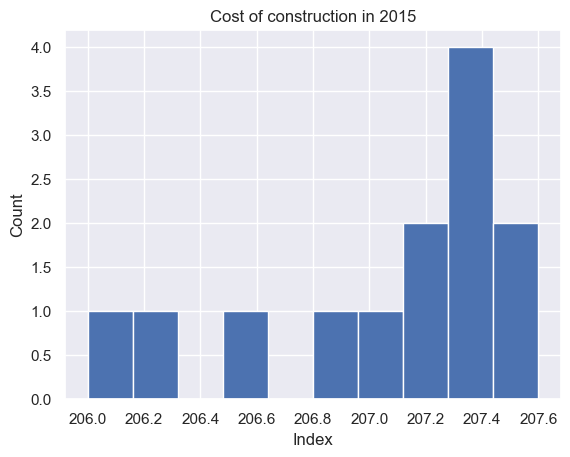

In [184]:
df1.hist(column='2015')
plt.title('Cost of construction in 2015')
plt.ylabel('Count')
plt.xlabel('Index')

Text(0.5, 0, 'Cost [€]')

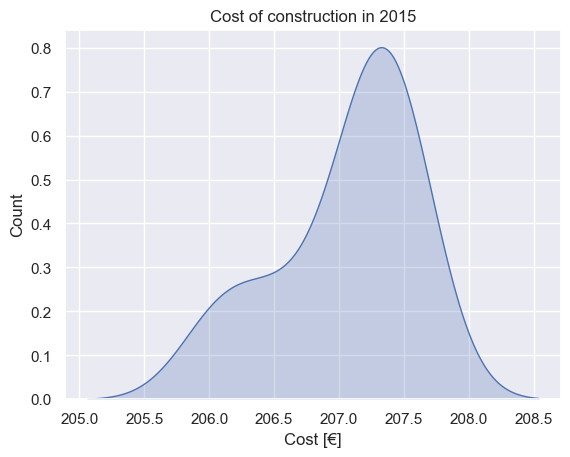

In [183]:
sns.kdeplot(x=df1['2015'], shade=True)
plt.title('Cost of construction in 2015')
plt.ylabel('Count')
plt.xlabel('Cost [€]')

Text(0.5, 0, 'Cost')

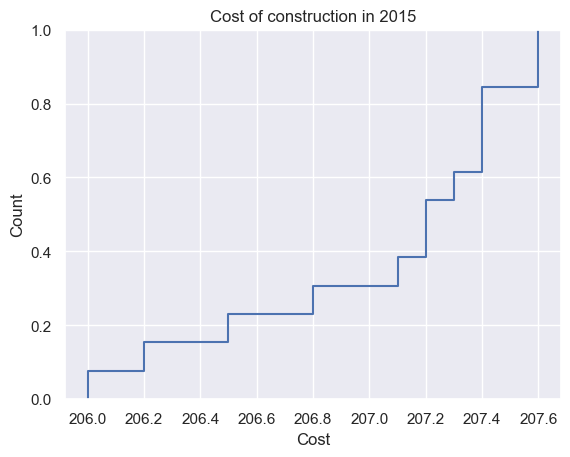

In [161]:
sns.ecdfplot(df1['2015'])
plt.title('Cost of construction in 2015')
plt.ylabel('Count')
plt.xlabel('Cost')

Text(0.5, 0, 'Index')

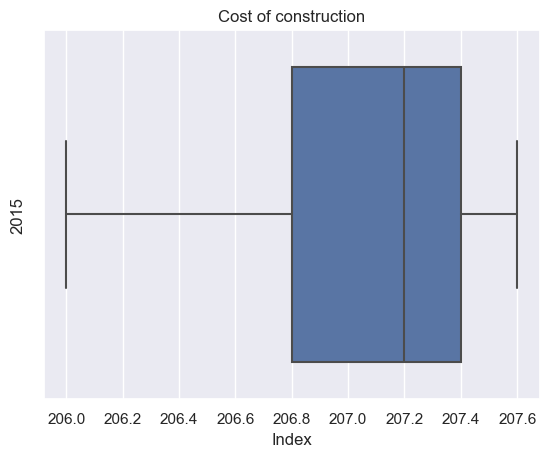

In [185]:
sns.boxplot(data=df1, x=df1['2015'])
plt.title('Cost of construction')
plt.ylabel('2015')
plt.xlabel('Index')

Text(0.5, 20.049999999999997, 'Ireland')

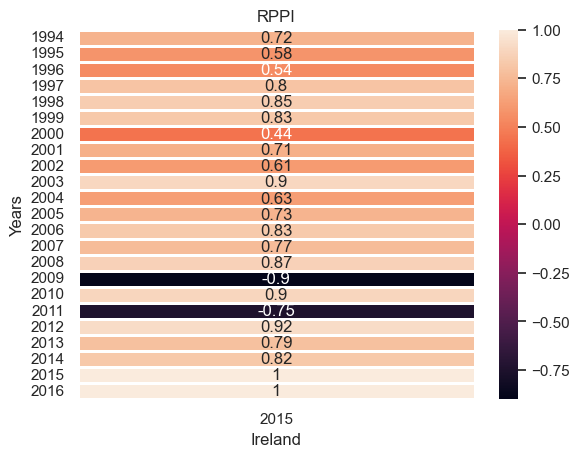

In [186]:
sns.heatmap(df1.corr()[['2015']],annot=True,linewidths=1)
plt.title('RPPI')
plt.ylabel('Years')
plt.xlabel('Ireland')

In [208]:
df2=pd.read_csv("Annual growth rates, construction cost indices for new residential buildings, 2005 - 2021,.csv")
print(df2)

   Construction cost (or producer prices), new residential buildings - annual data [sts_copi_a]  \
0                                                 NaN                                             
1                                         Last update                                             
2                                        Extracted on                                             
3                                      Source of data                                             
4                                                 NaN                                             
5                                            INDIC_BT                                             
6                                             NACE_R2                                             
7                                               S_ADJ                                             
8                                                UNIT                                             
9         

In [209]:
df2.columns

Index(['Construction cost (or producer prices), new residential buildings - annual data [sts_copi_a]',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [210]:
df2.drop([0,1,2,3,4,5,6,7,8,9,10,11,12],axis=0,inplace=True)
df2

,"Construction cost (or producer prices), new residential buildings - annual data [sts_copi_a]",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
13,NaN,2005,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,...,2021,NaN,2008-2009,Average annual rates,NaN,2011-2016,Average annual rates,NaN,2017 2018,Average annual rates
14,EU,2.8,3.7,4.4,4.1,0.4,1.9,3.3,1.9,0.7,...,6.5,NaN,104.5,2.23,NaN,108.3,1.62,NaN,107.1,2.30
15,EA-19,2.8,3.4,4.0,4.0,0.4,1.9,3.3,1.8,0.6,...,6.4,NaN,104.4,2.18,NaN,107.8,1.52,NaN,106.3,2.07
16,Belgium,2.9,4.8,4.5,2.4,-1.1,0.0,3.9,1.9,0.2,...,:,NaN,101.3,0.63,NaN,110.7,2.06,NaN,106.4,2.10
17,Bulgaria,8.3,6.0,6.6,12.5,7.5,-1.3,0.6,-0.6,1.4,...,12.2,NaN,120.9,9.97,NaN,104.3,0.84,NaN,110.7,3.46
18,Czechia,3.8,2.1,4.7,3.6,-0.3,1.1,1.8,0.5,-0.4,...,8.3,NaN,103.3,1.63,NaN,103.4,0.68,NaN,112.8,4.09
19,Denmark,2.4,4.8,6.3,2.9,-0.3,1.1,3.6,2.6,1.5,...,4.0,NaN,102.6,1.29,NaN,113.5,2.56,NaN,103.4,1.13
20,Germany,1.5,2.4,3.3,3.3,0.3,2.2,3.7,2.0,0.7,...,7.3,NaN,103.6,1.79,NaN,110.3,1.98,NaN,108.9,2.90
21,Estonia,6.3,10.4,12.8,3.5,-8.5,-2.6,3.4,4.3,5.0,...,9.4,NaN,94.7,-2.68,NaN,114.0,2.66,NaN,105.1,1.67
22,Ireland,8.7,9.6,1.8,-7.7,-9.9,0.5,-2.2,1.0,0.8,...,:,NaN,83.2,-8.81,NaN,101.1,0.21,NaN,107.8,2.53


In [211]:
# Renaming columns
df2=df2.rename(columns={
                   'Unnamed: 1':'2005',
                   'Unnamed: 2':'2006',
                   'Unnamed: 3':'2007',
                   'Unnamed: 4':'2008',
                   'Unnamed: 5':'2009',
                   'Unnamed: 6':'2010',
                   'Unnamed: 7':'2011',
                   'Unnamed: 8':'2012',
                   'Unnamed: 9':'2013',
                   'Unnamed: 10':'2014',
                   'Unnamed: 11':'2015',
                   'Unnamed: 12':'2016',
                   'Unnamed: 13':'2017',
                   'Unnamed: 14':'2018',
                   'Unnamed: 15':'2019',
                   'Unnamed: 16':'2020',
                   'Unnamed: 17':'2021',
                   
                   })


# Restarting counter
#df2 = df2.drop(df2.index[[0,13]],axis=0).reset_index(drop=True)
df2

,"Construction cost (or producer prices), new residential buildings - annual data [sts_copi_a]",2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2021,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
13,NaN,2005,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,...,2021,NaN,2008-2009,Average annual rates,NaN,2011-2016,Average annual rates,NaN,2017 2018,Average annual rates
14,EU,2.8,3.7,4.4,4.1,0.4,1.9,3.3,1.9,0.7,...,6.5,NaN,104.5,2.23,NaN,108.3,1.62,NaN,107.1,2.30
15,EA-19,2.8,3.4,4.0,4.0,0.4,1.9,3.3,1.8,0.6,...,6.4,NaN,104.4,2.18,NaN,107.8,1.52,NaN,106.3,2.07
16,Belgium,2.9,4.8,4.5,2.4,-1.1,0.0,3.9,1.9,0.2,...,:,NaN,101.3,0.63,NaN,110.7,2.06,NaN,106.4,2.10
17,Bulgaria,8.3,6.0,6.6,12.5,7.5,-1.3,0.6,-0.6,1.4,...,12.2,NaN,120.9,9.97,NaN,104.3,0.84,NaN,110.7,3.46
18,Czechia,3.8,2.1,4.7,3.6,-0.3,1.1,1.8,0.5,-0.4,...,8.3,NaN,103.3,1.63,NaN,103.4,0.68,NaN,112.8,4.09
19,Denmark,2.4,4.8,6.3,2.9,-0.3,1.1,3.6,2.6,1.5,...,4.0,NaN,102.6,1.29,NaN,113.5,2.56,NaN,103.4,1.13
20,Germany,1.5,2.4,3.3,3.3,0.3,2.2,3.7,2.0,0.7,...,7.3,NaN,103.6,1.79,NaN,110.3,1.98,NaN,108.9,2.90
21,Estonia,6.3,10.4,12.8,3.5,-8.5,-2.6,3.4,4.3,5.0,...,9.4,NaN,94.7,-2.68,NaN,114.0,2.66,NaN,105.1,1.67
22,Ireland,8.7,9.6,1.8,-7.7,-9.9,0.5,-2.2,1.0,0.8,...,:,NaN,83.2,-8.81,NaN,101.1,0.21,NaN,107.8,2.53


In [212]:
df2.drop(['Unnamed: 18'],axis=1,inplace=True)
df2

,"Construction cost (or producer prices), new residential buildings - annual data [sts_copi_a]",2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2020,2021,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
13,NaN,2005,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,...,2020.0,2021,2008-2009,Average annual rates,NaN,2011-2016,Average annual rates,NaN,2017 2018,Average annual rates
14,EU,2.8,3.7,4.4,4.1,0.4,1.9,3.3,1.9,0.7,...,1.0,6.5,104.5,2.23,NaN,108.3,1.62,NaN,107.1,2.30
15,EA-19,2.8,3.4,4.0,4.0,0.4,1.9,3.3,1.8,0.6,...,1.0,6.4,104.4,2.18,NaN,107.8,1.52,NaN,106.3,2.07
16,Belgium,2.9,4.8,4.5,2.4,-1.1,0.0,3.9,1.9,0.2,...,1.7,:,101.3,0.63,NaN,110.7,2.06,NaN,106.4,2.10
17,Bulgaria,8.3,6.0,6.6,12.5,7.5,-1.3,0.6,-0.6,1.4,...,2.2,12.2,120.9,9.97,NaN,104.3,0.84,NaN,110.7,3.46
18,Czechia,3.8,2.1,4.7,3.6,-0.3,1.1,1.8,0.5,-0.4,...,2.1,8.3,103.3,1.63,NaN,103.4,0.68,NaN,112.8,4.09
19,Denmark,2.4,4.8,6.3,2.9,-0.3,1.1,3.6,2.6,1.5,...,0.8,4.0,102.6,1.29,NaN,113.5,2.56,NaN,103.4,1.13
20,Germany,1.5,2.4,3.3,3.3,0.3,2.2,3.7,2.0,0.7,...,1.5,7.3,103.6,1.79,NaN,110.3,1.98,NaN,108.9,2.90
21,Estonia,6.3,10.4,12.8,3.5,-8.5,-2.6,3.4,4.3,5.0,...,0.5,9.4,94.7,-2.68,NaN,114.0,2.66,NaN,105.1,1.67
22,Ireland,8.7,9.6,1.8,-7.7,-9.9,0.5,-2.2,1.0,0.8,...,1.1,:,83.2,-8.81,NaN,101.1,0.21,NaN,107.8,2.53


In [213]:
df2.drop(['Unnamed: 21'],axis=1,inplace=True)

In [214]:
df2.drop(['Unnamed: 24'],axis=1,inplace=True)

In [215]:
df2.columns

Index(['Construction cost (or producer prices), new residential buildings - annual data [sts_copi_a]',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [216]:
# Renaming columns
df2=df2.rename(columns={
                   'Unnamed: 19' : '2008-2009', 
                   'Unnamed: 20' : 'Average annual rates', 
                    
                   'Unnamed: 22':'2017-2018',
                   'Unnamed: 23':'Average annual rates', 
                    
                   'Unnamed: 25':'2017-2018', 
                   'Unnamed: 26':'Average annual rates'
                   })
df2

,"Construction cost (or producer prices), new residential buildings - annual data [sts_copi_a]",2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2018,2019,2020,2021,2008-2009,Average annual rates,2017-2018,Average annual rates,2017-2018,Average annual rates
13,NaN,2005,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,...,2018.0,2019.0,2020.0,2021,2008-2009,Average annual rates,2011-2016,Average annual rates,2017 2018,Average annual rates
14,EU,2.8,3.7,4.4,4.1,0.4,1.9,3.3,1.9,0.7,...,2.8,1.8,1.0,6.5,104.5,2.23,108.3,1.62,107.1,2.30
15,EA-19,2.8,3.4,4.0,4.0,0.4,1.9,3.3,1.8,0.6,...,2.5,1.5,1.0,6.4,104.4,2.18,107.8,1.52,106.3,2.07
16,Belgium,2.9,4.8,4.5,2.4,-1.1,0.0,3.9,1.9,0.2,...,2.5,2.5,1.7,:,101.3,0.63,110.7,2.06,106.4,2.10
17,Bulgaria,8.3,6.0,6.6,12.5,7.5,-1.3,0.6,-0.6,1.4,...,2.9,5.0,2.2,12.2,120.9,9.97,104.3,0.84,110.7,3.46
18,Czechia,3.8,2.1,4.7,3.6,-0.3,1.1,1.8,0.5,-0.4,...,4.1,5.5,2.1,8.3,103.3,1.63,103.4,0.68,112.8,4.09
19,Denmark,2.4,4.8,6.3,2.9,-0.3,1.1,3.6,2.6,1.5,...,1.8,0.8,0.8,4.0,102.6,1.29,113.5,2.56,103.4,1.13
20,Germany,1.5,2.4,3.3,3.3,0.3,2.2,3.7,2.0,0.7,...,3.4,2.0,1.5,7.3,103.6,1.79,110.3,1.98,108.9,2.90
21,Estonia,6.3,10.4,12.8,3.5,-8.5,-2.6,3.4,4.3,5.0,...,1.9,1.9,0.5,9.4,94.7,-2.68,114.0,2.66,105.1,1.67
22,Ireland,8.7,9.6,1.8,-7.7,-9.9,0.5,-2.2,1.0,0.8,...,4.0,2.3,1.1,:,83.2,-8.81,101.1,0.21,107.8,2.53


In [217]:
df2.drop([13],axis=0,inplace=True)
df2

,"Construction cost (or producer prices), new residential buildings - annual data [sts_copi_a]",2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2018,2019,2020,2021,2008-2009,Average annual rates,2017-2018,Average annual rates,2017-2018,Average annual rates
14,EU,2.8,3.7,4.4,4.1,0.4,1.9,3.3,1.9,0.7,...,2.8,1.8,1.0,6.5,104.5,2.23,108.3,1.62,107.1,2.30
15,EA-19,2.8,3.4,4.0,4.0,0.4,1.9,3.3,1.8,0.6,...,2.5,1.5,1.0,6.4,104.4,2.18,107.8,1.52,106.3,2.07
16,Belgium,2.9,4.8,4.5,2.4,-1.1,0.0,3.9,1.9,0.2,...,2.5,2.5,1.7,:,101.3,0.63,110.7,2.06,106.4,2.10
17,Bulgaria,8.3,6.0,6.6,12.5,7.5,-1.3,0.6,-0.6,1.4,...,2.9,5.0,2.2,12.2,120.9,9.97,104.3,0.84,110.7,3.46
18,Czechia,3.8,2.1,4.7,3.6,-0.3,1.1,1.8,0.5,-0.4,...,4.1,5.5,2.1,8.3,103.3,1.63,103.4,0.68,112.8,4.09
19,Denmark,2.4,4.8,6.3,2.9,-0.3,1.1,3.6,2.6,1.5,...,1.8,0.8,0.8,4.0,102.6,1.29,113.5,2.56,103.4,1.13
20,Germany,1.5,2.4,3.3,3.3,0.3,2.2,3.7,2.0,0.7,...,3.4,2.0,1.5,7.3,103.6,1.79,110.3,1.98,108.9,2.90
21,Estonia,6.3,10.4,12.8,3.5,-8.5,-2.6,3.4,4.3,5.0,...,1.9,1.9,0.5,9.4,94.7,-2.68,114.0,2.66,105.1,1.67
22,Ireland,8.7,9.6,1.8,-7.7,-9.9,0.5,-2.2,1.0,0.8,...,4.0,2.3,1.1,:,83.2,-8.81,101.1,0.21,107.8,2.53
23,Greece,3.4,4.3,4.5,5.1,-0.3,1.8,1.0,-0.1,-1.4,...,0.6,0.1,0.1,3.3,104.8,2.36,92.7,-1.51,100.9,0.30


In [218]:
df2 = df2.drop(df2.index[[0]],axis=0).reset_index(drop=True)

In [117]:

df2

,"Construction cost (or producer prices), new residential buildings - annual data [sts_copi_a]",2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2018,2019,2020,2021,2008-2009,Average annual rates,2017-2018,Average annual rates,2017-2018,Average annual rates
0,EA-19,2.8,3.4,4.0,4.0,0.4,1.9,3.3,1.8,0.6,...,2.5,1.5,1.0,6.4,104.4,2.18,107.8,1.52,106.3,2.07
1,Belgium,2.9,4.8,4.5,2.4,-1.1,0.0,3.9,1.9,0.2,...,2.5,2.5,1.7,:,101.3,0.63,110.7,2.06,106.4,2.10
2,Bulgaria,8.3,6.0,6.6,12.5,7.5,-1.3,0.6,-0.6,1.4,...,2.9,5.0,2.2,12.2,120.9,9.97,104.3,0.84,110.7,3.46
3,Czechia,3.8,2.1,4.7,3.6,-0.3,1.1,1.8,0.5,-0.4,...,4.1,5.5,2.1,8.3,103.3,1.63,103.4,0.68,112.8,4.09
4,Denmark,2.4,4.8,6.3,2.9,-0.3,1.1,3.6,2.6,1.5,...,1.8,0.8,0.8,4.0,102.6,1.29,113.5,2.56,103.4,1.13
5,Germany,1.5,2.4,3.3,3.3,0.3,2.2,3.7,2.0,0.7,...,3.4,2.0,1.5,7.3,103.6,1.79,110.3,1.98,108.9,2.90
6,Estonia,6.3,10.4,12.8,3.5,-8.5,-2.6,3.4,4.3,5.0,...,1.9,1.9,0.5,9.4,94.7,-2.68,114.0,2.66,105.1,1.67
7,Ireland,8.7,9.6,1.8,-7.7,-9.9,0.5,-2.2,1.0,0.8,...,4.0,2.3,1.1,:,83.2,-8.81,101.1,0.21,107.8,2.53
8,Greece,3.4,4.3,4.5,5.1,-0.3,1.8,1.0,-0.1,-1.4,...,0.6,0.1,0.1,3.3,104.8,2.36,92.7,-1.51,100.9,0.30
9,Spain,4.7,6.9,5.0,4.7,1.1,2.5,3.8,-0.3,0.3,...,2.5,1.1,-0.8,8.4,105.9,2.88,101.2,0.24,105.8,1.90


In [219]:
df2.drop([34,35,36,37],axis=0,inplace=True)

In [220]:
df2.transpose()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
"Construction cost (or producer prices), new residential buildings - annual data [sts_copi_a]",EA-19,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Slovenia,Slovakia,Finland,Sweden,Norway,Switzerland,Montenegro,North Macedonia,Albania,Turkey
2005,2.8,2.9,8.3,3.8,2.4,1.5,6.3,8.7,3.4,4.7,...,4.6,4.7,3.3,3.9,3.3,2.3,20.6,:,1.3,8.7
2006,3.4,4.8,6.0,2.1,4.8,2.4,10.4,9.6,4.3,6.9,...,6.1,4.0,3.8,5.0,3.8,2.6,36.3,8.9,1.1,15.9
2007,4.0,4.5,6.6,4.7,6.3,3.3,12.8,1.8,4.5,5.0,...,6.9,4.2,5.8,6.1,7.4,3.9,25.1,2.5,2.6,8.4
2008,4.0,2.4,12.5,3.6,2.9,3.3,3.5,-7.7,5.1,4.7,...,6.6,5.7,3.9,4.9,5.7,3.9,14.0,4.6,1.3,13.8
2009,0.4,-1.1,7.5,-0.3,-0.3,0.3,-8.5,-9.9,-0.3,1.1,...,-3.1,2.1,-1.1,2.0,2.3,0.0,-14.9,6.0,0.0,-4.1
2010,1.9,0.0,-1.3,1.1,1.1,2.2,-2.6,0.5,1.8,2.5,...,5.7,-0.1,1.1,2.6,3.1,-0.1,-4.3,-2.2,0.3,5.7
2011,3.3,3.9,0.6,1.8,3.6,3.7,3.4,-2.2,1.0,3.8,...,4.5,0.7,3.3,3.0,3.7,2.0,6.6,5.1,0.4,12.4
2012,1.8,1.9,-0.6,0.5,2.6,2.0,4.3,1.0,-0.1,-0.3,...,-1.2,0.1,2.5,2.6,3.0,0.2,-14.7,1.6,0.7,5.5
2013,0.6,0.2,1.4,-0.4,1.5,0.7,5.0,0.8,-1.4,0.3,...,-1.1,0.6,0.9,1.7,2.9,0.2,2.9,1.9,0.9,5.2


In [221]:
df2.describe()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,7.061765,7.029412,5.855882,-1.370588,0.355882,3.082353,1.305882,0.850000,0.800000,0.732353,0.767647,2.726471,3.641176,3.500000,1.832353
std,8.145756,5.299659,4.332834,5.016671,2.892330,2.599006,3.387673,2.482087,2.224655,2.101330,3.001890,2.839047,4.293908,3.478854,3.694937
min,1.100000,1.800000,-7.700000,-14.900000,-7.500000,-2.200000,-14.700000,-5.700000,-3.400000,-6.800000,-8.100000,-0.300000,0.600000,0.100000,-10.800000
25%,2.925000,4.000000,3.650000,-2.575000,-0.250000,1.500000,0.350000,0.200000,0.200000,-0.450000,-0.350000,0.900000,1.825000,1.200000,0.500000
50%,4.700000,4.950000,5.000000,0.100000,0.950000,3.050000,1.950000,0.850000,0.700000,1.000000,0.700000,2.150000,2.600000,2.650000,1.350000
75%,6.900000,7.550000,7.650000,1.400000,1.900000,3.775000,2.600000,1.875000,1.100000,1.575000,1.600000,3.175000,3.750000,4.450000,2.200000
max,36.600000,25.100000,16.200000,7.500000,5.700000,12.400000,6.400000,5.200000,10.500000,5.900000,12.800000,14.300000,25.200000,17.900000,12.900000


In [222]:
df2.dtypes

Construction cost (or producer prices), new residential buildings - annual data [sts_copi_a]     object
2005                                                                                             object
2006                                                                                            float64
2007                                                                                            float64
2008                                                                                            float64
2009                                                                                            float64
2010                                                                                            float64
2011                                                                                            float64
2012                                                                                            float64
2013                                                            

Text(0.5, 20.049999999999997, 'Ireland')

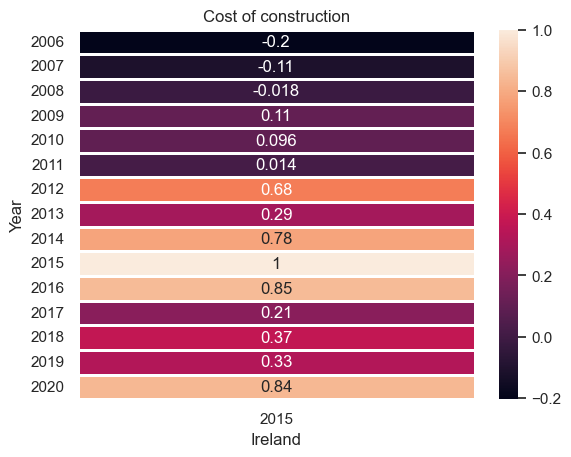

In [223]:
sns.heatmap(df2.corr()[['2015']],annot=True,linewidths=1)
plt.title('Cost of construction')
plt.ylabel('Year')
plt.xlabel('Ireland')

Text(0.5, 0, 'Ireland')

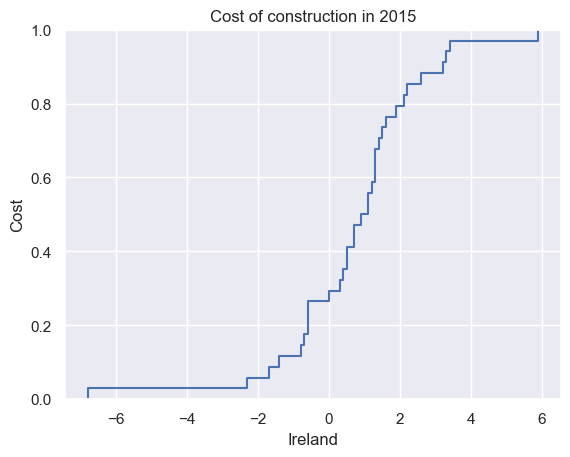

In [224]:
sns.ecdfplot(df2['2015'])
plt.title('Cost of construction in 2015')
plt.ylabel('Cost')
plt.xlabel('Ireland')

Text(0.5, 0, 'Ireland')

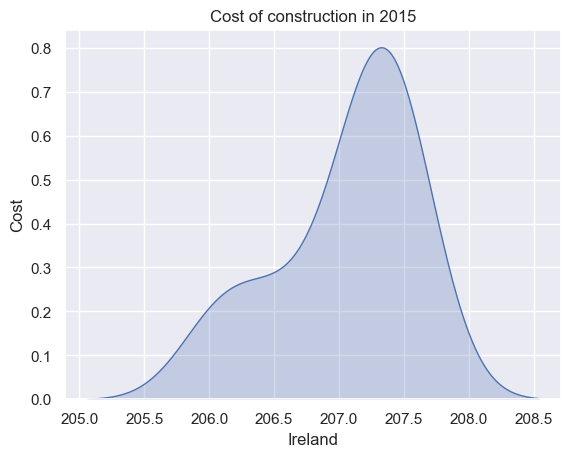

In [225]:
sns.kdeplot(x=df1['2015'], shade=True)
plt.title('Cost of construction in 2015')
plt.ylabel('Cost')
plt.xlabel('Ireland')

Text(0.5, 0, 'Ireland')

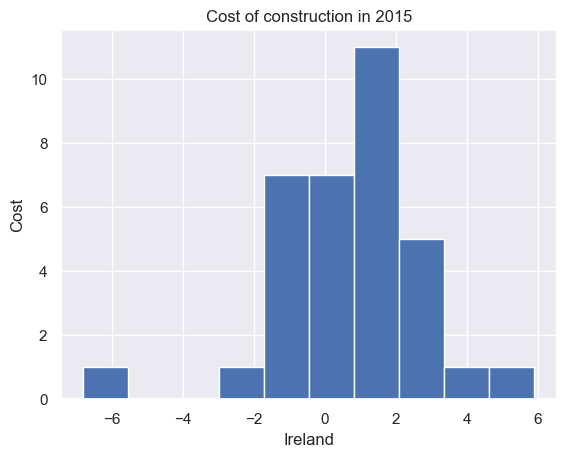

In [226]:
df2.hist(column='2015')
plt.title('Cost of construction in 2015')
plt.ylabel('Cost')
plt.xlabel('Ireland')

In [171]:
df3=pd.read_csv("TTLCONS.csv")
print(df3)

           DATE  TTLCONS
0    1993-01-01   458080
1    1993-02-01   462967
2    1993-03-01   458399
3    1993-04-01   469425
4    1993-05-01   468998
..          ...      ...
358  2022-11-01  1840294
359  2022-12-01  1838507
360  2023-01-01  1835483
361  2023-02-01  1829580
362  2023-03-01  1834692

[363 rows x 2 columns]


In [172]:
df3.dtypes

DATE       object
TTLCONS     int64
dtype: object

Text(0.5, 0, 'USD')

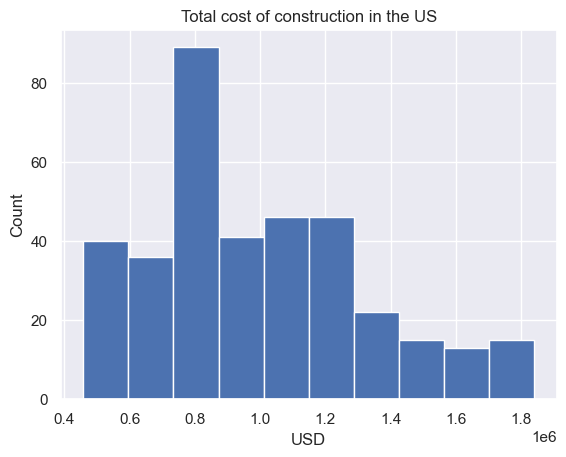

In [177]:
df3.hist(column='TTLCONS')
plt.title('Total cost of construction in the US')
plt.ylabel('Count')
plt.xlabel('USD')

Text(0.5, 0, 'USD')

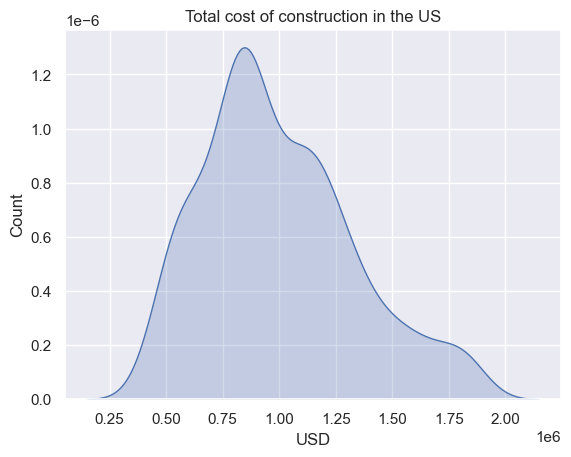

In [180]:
sns.kdeplot(x=df3['TTLCONS'], shade=True)
plt.title('Total cost of construction in the US')
plt.ylabel('Count')
plt.xlabel('USD')

Text(0.5, 0, 'USD')

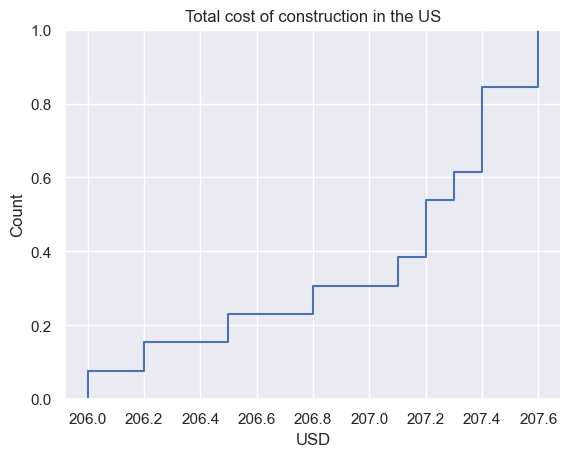

In [181]:
sns.ecdfplot(df1['2015'])
plt.title('Total cost of construction in the US')
plt.ylabel('Count')
plt.xlabel('USD')

In [130]:
import requests
import json
import pprint
API_KEY='5832b9d89a1f6bd6136494a4f8f32530'
url="https://api.stlouisfed.org/fred/series/search?api_key=abcdefghijklmnopqrstuvwxyz123456&search_text=canada"
https://api.stlouisfed.org/fred/series/

#params ={"q":"position"}
response = requests.get(url)
print(response)
#if response.status_code == 200:
  #  data = json.loads(response.text)
   # print(data[0]['downloadCount'])
   
    
#else:
#print(f"Error: {response.status_code}")

SyntaxError: invalid syntax (143919779.py, line 6)

In [227]:
# Generate an array of 40 values that follow a N(30, 5) distribution
from numpy import random
random.seed(13)
out = random.normal(loc=205, scale=60, size=40)
out

array([162.25656028, 250.22598272, 202.3298153 , 232.10874032,
       285.70610251, 236.9402733 , 286.01127398, 256.67268245,
       293.72114425, 142.27737217, 157.6606585 , 129.30364328,
       238.77080712, 190.40042489, 259.82444229, 224.04105536,
       212.63819681, 334.02297804, 241.37731941, 203.393701  ,
       145.95035309, 276.44231635, 262.16983666, 139.76910455,
       196.28732004, 219.2714703 , 106.65439533, 188.31192901,
       288.95430521, 108.0935222 , 234.45230995, 318.56453313,
       167.74121786, 177.77485713, 218.04709957, 235.85973131,
       228.83447958, 114.22929308, 159.15796182, 211.07618714])

In [228]:
out.mean()

213.43313493273877

In [229]:
from scipy import stats

# Run the test:
stats.ttest_1samp(out, popmean=213)

Ttest_1sampResult(statistic=0.04712040510750861, pvalue=0.962657736700763)

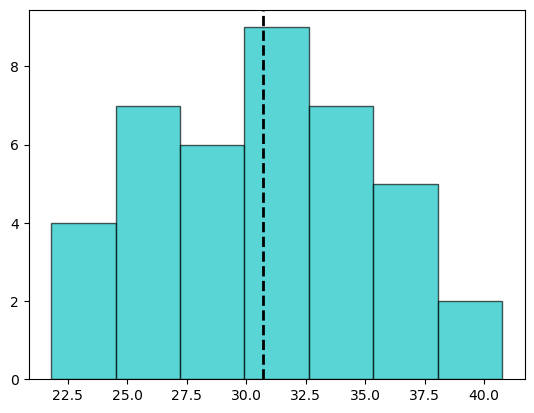

In [8]:
# Producing a plot of the data:
import matplotlib.pyplot as plt
result = plt.hist(out, bins=7, color='c', edgecolor='k', alpha=0.65)
plt.axvline(out.mean(), color='k', linestyle='dashed', linewidth=2) # Sample mean
#plt.axvline(mu, color='red', linestyle='solid', linewidth=2) # Hypothesised mu

## One-tailed Tests

In [9]:
# We just need to run:
from scipy import stats
stats.ttest_1samp(out, popmean=30, alternative = "greater")

Ttest_1sampResult(statistic=0.9174340472708916, pvalue=0.18227708798483594)

In [10]:
import numpy as np
random.seed(13)
rvs = random.normal(size=(100, 50), loc = 30, scale = 5)
res = stats.ttest_1samp(rvs, popmean=30, axis=1)
np.sum(res.pvalue < 0.05)

5

In [11]:
# Create a function to glimpse the data
def glimpse(df):
    print(f"{df.shape[0]} rows and {df.shape[1]} columns")
    display(df.head())
    display(df.tail())

# Import package
from pydataset import data
# Check out datasets
data()

ModuleNotFoundError: No module named 'pydataset'

In [12]:
# Load as a dataframe
df = data('iris')
glimpse(df)

NameError: name 'data' is not defined

In [ ]:
# from scipy import stats
# stats.ttest_1samp(df['Sepal.Length'], popmean=5.5, alternative = "greater")

# from scipy import stats
# df1 = df[(df.Species=='virginica')]
# stats.ttest_1samp(df1['Petal.Width'], popmean=2)

## Two-sample t-tests

In [13]:
# Import the library
import scipy.stats as stats
import numpy as np
 
# Creating data groups
data_group1 = np.array([14, 15, 15, 16, 13, 8, 14,
                        17, 16, 14, 19, 20, 21, 15,
                        15, 16, 16, 13, 14, 12])
 
data_group2 = np.array([15, 17, 14, 17, 14, 8, 12,
                        19, 19, 14, 17, 22, 24, 16,
                        13, 16, 13, 18, 15, 13])

In [14]:
print(data_group1.mean(), data_group2.mean())

15.15 15.8


## Two-sample t-tests:

In [1]:
# Import the library
import scipy.stats as stats
import numpy as np
 
# Creating data groups
data_group1 = np.array([14, 15, 15, 16, 13, 8, 14,
                        17, 16, 14, 19, 20, 21, 15,
                        15, 16, 16, 13, 14, 12])
 
data_group2 = np.array([15, 17, 14, 17, 14, 8, 12,
                        19, 19, 14, 17, 22, 24, 16,
                        13, 16, 13, 18, 15, 13])

In [2]:
print(data_group1.mean(), data_group2.mean())

15.15 15.8


In [3]:
# Perform the two-sample t-test with equal variances:
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=-0.6337397070250238, pvalue=0.5300471010405257)

In [4]:
# Perform the two-sample t-test:
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=False)

Ttest_indResult(statistic=-0.6337397070250238, pvalue=0.5302413334606599)

In [5]:
# Subsetting:
df1 = df[(df.Species=='virginica')]
df2 = df[(df.Species=='versicolor')]

NameError: name 'df' is not defined

In [6]:
# Let's perform the test:
# Perform the two-sample t-test with equal variances:
stats.ttest_ind(a=df1['Sepal.Length'], b=df2['Sepal.Length'])

NameError: name 'df1' is not defined

In [7]:
# Let's confirm this using a plot:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a boxplot by group:
sns.boxplot(x = 'Species', y ='Sepal.Length',
            data=df)
plt.title('Box plot of Sepal Length by Species',
          fontsize=15)


NameError: name 'df' is not defined

## Hypothesis testing for proportions

In [8]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([81, 468])
nobs = np.array([314, 577])
stat, pval = proportions_ztest(count, nobs)
pval

3.7117477701134797e-59

## Hypothesis testing for paired (dependent) samples

In [9]:
# Importing library
import scipy.stats as stats
  
# pre holds the mileage before 
# applying the different engine oil
pre = [30, 31, 34, 40, 36, 35,
       34, 30, 28, 29]
  
# post holds the mileage after 
# applying the different engine oil
post = [30, 31, 32, 38, 32, 31,
        32, 29, 28, 30]
  
# Performing the paired sample t-test
stats.ttest_rel(pre, post)

Ttest_relResult(statistic=2.584921310565987, pvalue=0.029457853822895275)

## Hypothesis Tests III

In [10]:
# Import the packages needed
from scipy.stats import chisquare
from collections import Counter

# Create the data as it would be in a column (though obviously it wouldn't necessarily be in order in our results):
preferences = ["SF"] * 61 + ["FF"] * 53 + ["FG"] * 36
print(preferences)

['SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG']


In [11]:
# Convert to frequencies
counter = Counter(preferences)
frequencies = [count for count in counter.values()]
print(frequencies)

[61, 53, 36]


## Two-sample  𝜒2 tests

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("titanic.csv", usecols=['pclass','survived'])
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

NameError: name 'df' is not defined

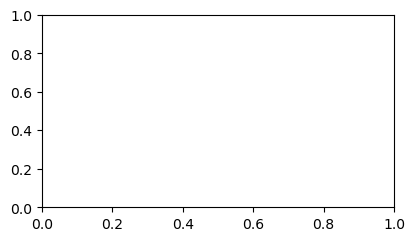

In [13]:
plt.figure(figsize=(10,2.5))

plt.subplot(121)
sns.countplot(df.pclass)
plt.title("Passenger Class")

plt.subplot(122)
sns.countplot(df.survived)
plt.title("Survived or not")

plt.show()

In [14]:
# Making a two-way contingency table:
PClass_survd = pd.pivot_table(df, index=['pclass'],columns=['survived'],aggfunc='size')
PClass_survd

NameError: name 'df' is not defined

In [15]:
# Perform a hypothesis test of indepdence between the rows and columns -
# that is, the null hypothesis is that whether someone survived or not is
# independent from their passenger class, that is, X is independent of Y
from scipy import stats
chi2_stat, p_val, dof, ex = stats.chi2_contingency(PClass_survd)

print("Chi square value is ",chi2_stat)
print("P value is",p_val)
print("Degrees of Freedom:",dof)

NameError: name 'PClass_survd' is not defined

In [16]:
# A heatmap:
sns.heatmap(PClass_survd, annot=True, fmt='g',square=True, cmap='hot')
plt.title('Class Vs Survived',fontsize=20)
plt.show()


NameError: name 'PClass_survd' is not defined

  Survived Passenger Class  value
0       No           First    123
1      Yes           First    200
2       No          Second    158
3      Yes          Second    119
4       No           Third    528
5      Yes           Third    181


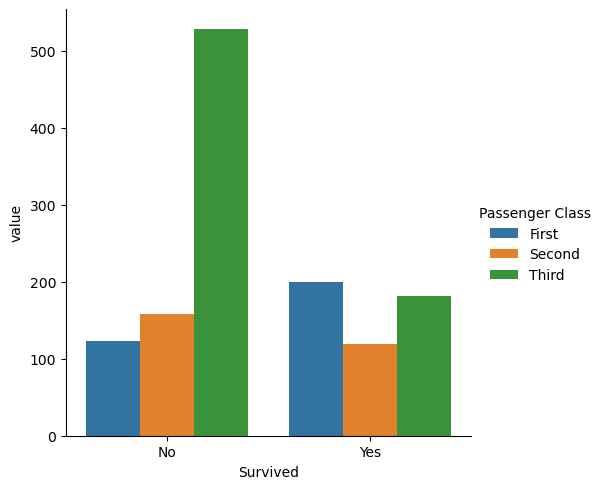

In [17]:
# Making a plot of the two-way table:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dfs = pd.DataFrame(data={'Survived': ['No','Yes'], 
                         'First': [123, 200], 
                         'Second': [158, 119], 
                         'Third': [528, 181]})

# Melt the dataframe:
dfs1 = pd.melt(dfs, id_vars = "Survived")
dfs1 = dfs1.rename(columns={"variable": "Passenger Class"})

print(dfs1)

sns.catplot(x = 'Survived', y='value', 
               hue = 'Passenger Class',data=dfs1, kind='bar')
plt.show()

## Tests regarding particular distributions (with a two-sample test included also):

In [19]:
# Reading in the prostate dataset:
prostate = pd.read_csv('http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/prostate.data',
                       sep='\t')
prostate.head()

,Unnamed: 0,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [20]:
prostate_numeric = prostate.drop(['Unnamed: 0','train'],axis=1)
prostate_std = (prostate_numeric-prostate_numeric.mean())/prostate_numeric.std()

In [21]:
print(round(prostate_std.corr(), 3))

         lcavol  lweight    age   lbph    svi    lcp  gleason  pgg45   lpsa
lcavol    1.000    0.281  0.225  0.027  0.539  0.675    0.432  0.434  0.734
lweight   0.281    1.000  0.348  0.442  0.155  0.165    0.057  0.107  0.433
age       0.225    0.348  1.000  0.350  0.118  0.128    0.269  0.276  0.170
lbph      0.027    0.442  0.350  1.000 -0.086 -0.007    0.078  0.078  0.180
svi       0.539    0.155  0.118 -0.086  1.000  0.673    0.320  0.458  0.566
lcp       0.675    0.165  0.128 -0.007  0.673  1.000    0.515  0.632  0.549
gleason   0.432    0.057  0.269  0.078  0.320  0.515    1.000  0.752  0.369
pgg45     0.434    0.107  0.276  0.078  0.458  0.632    0.752  1.000  0.422
lpsa      0.734    0.433  0.170  0.180  0.566  0.549    0.369  0.422  1.000


In [22]:
lpsa_gt_65 = prostate.lpsa[prostate.age>65]
lpsa_lt_65 = prostate.lpsa[prostate.age<=65]

In [23]:
stats.ttest_ind(lpsa_gt_65, lpsa_lt_65)

Ttest_indResult(statistic=2.0777882056885852, pvalue=0.04042631355837747)

<AxesSubplot:>

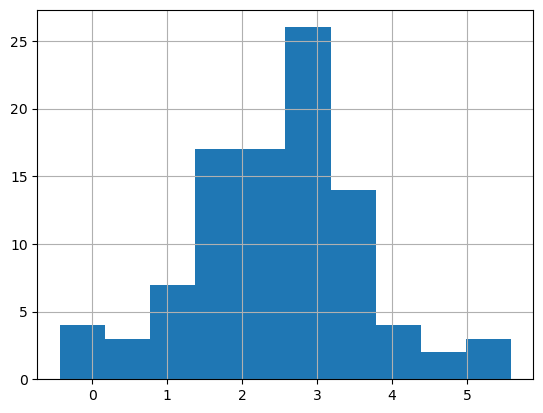

In [24]:
plt.figure()
prostate.lpsa.hist()

In [25]:
stats.kstest(prostate.lpsa, 'norm')

KstestResult(statistic=0.7943202030140284, pvalue=4.757662873905775e-66)

In [26]:
# Find the sample mean and standard deviation, our best estimate of mu and sigma:
# from pandas import mean
xbar = prostate.lpsa.mean()
s = prostate.lpsa.std()
# mean.lspa = pd.mean(prostate.lpsa)
stats.kstest(prostate.lpsa, 'norm', args = (xbar, s))

KstestResult(statistic=0.06551593415018797, pvalue=0.7743874556160386)

In [27]:
# Or:
stats.kstest(prostate_std.lpsa, 'norm')

KstestResult(statistic=0.06551593415018797, pvalue=0.7743874556160386)

## Two-sample KS test:

In [28]:
SA = pd.read_csv('http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data')
SA.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [33]:
# Subsetting first:
df1 = SA[(SA.chd==1)]
df1.head()
# Subsetting first:
df0 = SA[(SA.chd==0)]
df0.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
5,6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
6,7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
8,9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
12,13,118,0.00,1.88,10.05,Absent,59,21.57,0.00,17,0


In [34]:
# Running the test:
stats.ks_2samp(df0.sbp, df1.sbp)

KstestResult(statistic=0.16668046357615893, pvalue=0.0051131068242459094)

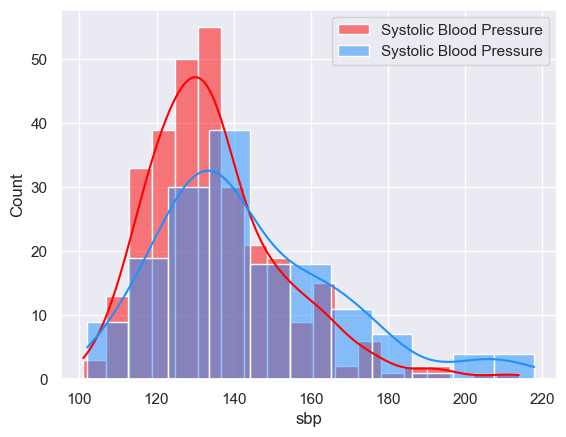

In [35]:
# An appropriate plot to see this:
import seaborn as sns
import matplotlib.pyplot as plt
# Set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
# df = sns.load_dataset("iris")

sns.histplot(data=df0, x="sbp", color="red", label="Systolic Blood Pressure", kde=True)
sns.histplot(data=df1, x="sbp", color="dodgerblue", label="Systolic Blood Pressure", kde=True)

plt.legend() 
plt.show()

<AxesSubplot:xlabel='chd', ylabel='sbp'>

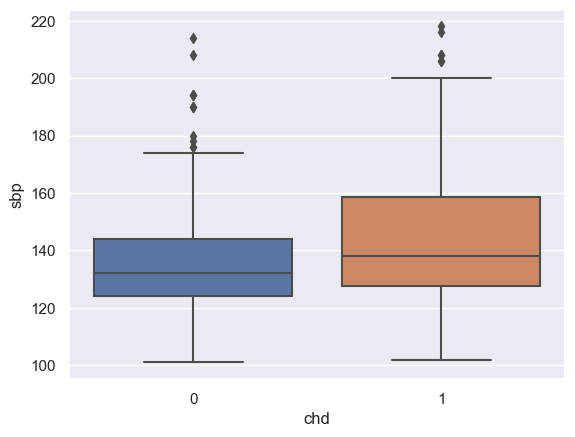

In [36]:
# Or alternatively:
sns.boxplot(data=SA, x="chd", y="sbp")

## Hypothesis Tests IV

In [37]:
# Create a function to glimpse the data
def glimpse(df):
    print(f"{df.shape[0]} rows and {df.shape[1]} columns")
    display(df.head())
    display(df.tail())

# Import package
from pydataset import data

# Load as a dataframe
df = data('iris')
glimpse(df)

ModuleNotFoundError: No module named 'pydataset'

In [38]:
# Subsetting:
df1 = df[(df.Species=='setosa')]
df2 = df[(df.Species=='virginica')]
df3 = df[(df.Species=='versicolor')]

# Let's perform the test:
# Import the library
import scipy.stats as stats

# Perform the one-way ANOVA test:
stats.f_oneway(df1['Sepal.Length'], df2['Sepal.Length'], df3['Sepal.Length'])

NameError: name 'df' is not defined

In [39]:
import matplotlib.pyplot as plt

# Add three histograms to one plot
plt.hist(df1['Sepal.Length'], alpha=0.5, label='Setosa')
plt.hist(df2['Sepal.Length'], alpha=0.5, label='Versicolor')
plt.hist(df3['Sepal.Length'], alpha=0.5, label='Virginica')

# Add plot title and axis labels
plt.title('Sepal length by species')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')

# Add legend
plt.legend(title='Species')

# Display plot
plt.show()

KeyError: 'Sepal.Length'

In [40]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey-Kramer Analysis:
tukey = pairwise_tukeyhsd(endog=df['Sepal.Length'],
                          groups=df['Species'],
                          alpha=0.05)

#display results
print(tukey)

NameError: name 'df' is not defined

In [41]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds', cache=True, data_home=None)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [42]:
# Perform the one-way ANOVA test - does the mean price per colour differ?
diamonds = sns.load_dataset('diamonds', cache=True, data_home=None)

# Let's take the first 1,000 rows:
diamonds = diamonds.head(int(1e3))

import scipy.stats as stats
stats.f_oneway(
 *(diamonds.loc[diamonds['color']==color, 'price'] 
 for color in diamonds['color'].unique())
 )

F_onewayResult(statistic=14.232408746791068, pvalue=1.3250352064676033e-15)

In [43]:
# Perform Tukey-Kramer Analysis
tukey = pairwise_tukeyhsd(endog=diamonds['price'],
                          groups=diamonds['color'],
                          alpha=0.05)

#display results
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     D      E   -51.809 0.9972   -312.445   208.827  False
     D      F   98.0582 0.9283  -165.3849  361.5013  False
     D      G  -18.1209    1.0  -309.9891  273.7474  False
     D      H -286.5718 0.0715  -586.2042   13.0605  False
     D      I -646.6851    0.0  -969.4521 -323.9181   True
     D      J -604.1625 0.0003 -1014.1465 -194.1784   True
     E      F  149.8672 0.4147   -71.4193  371.1537  False
     E      G   33.6882 0.9997   -220.777  288.1533  False
     E      H -234.7628  0.117  -498.0972   28.5715  False
     E      I -594.8761    0.0  -884.2616 -305.4906   True
     E      J -552.3534 0.0005  -936.6091 -168.0978   True
     F      G -116.1791  0.836  -373.5186  141.1605  False
     F      H -384.6301 0.0004   -650.743 -118.5171   True
     F      I -744.7433    0.0 -1036.6595 -452.8271   Tr